In [1]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import hiddenlayer as hl
import sklearn

import time

In [2]:
data = pd.read_csv('datasets/bike_sharing.csv', index_col=0)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.shape

(731, 16)

Text(0.5, 1.0, 'Number of bikes rented per season')

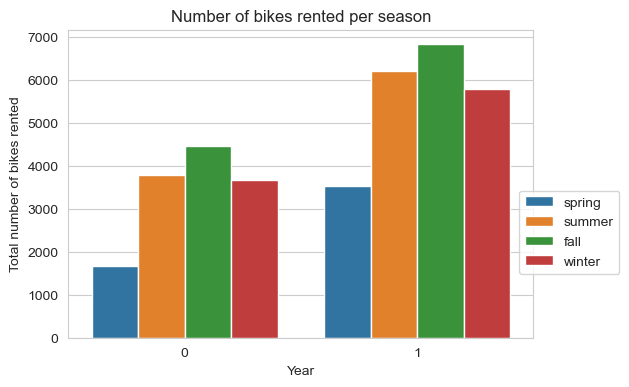

In [5]:
plt.figure(figsize=(6, 4))

sns.barplot(x='yr', y='cnt', hue = 'season', data=data, errorbar=None) # hue - 色彩

plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,0.5))

plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')

plt.title('Number of bikes rented per season')

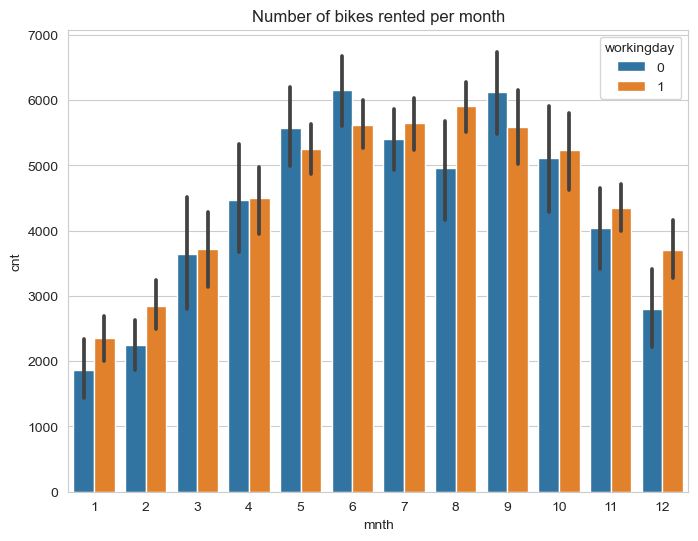

In [6]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'mnth', y = 'cnt', hue = 'workingday', data=data)
plt.title('Number of bikes rented per month')
plt.show()

Text(0, 0.5, 'Total number of bikes rented')

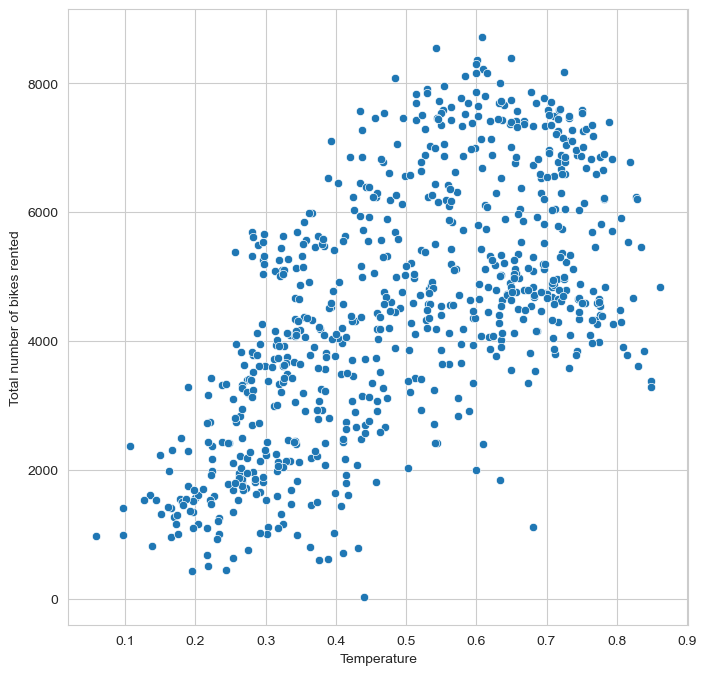

In [7]:
plt.figure(figsize=(8,8))
fig = sns.scatterplot(x='temp', y='cnt', data=data)
plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented')

In [8]:
data = pd.get_dummies(data, columns=['season'], dtype=int)
data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
338,339,2011-12-05,0,12,0,1,1,2,0.385833,0.393925,0.827083,0.062208,233,3578,3811,0,0,0,1
498,499,2012-05-13,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117,2172,3946,6118,0,0,1,0
1,2,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,1,0,0
269,270,2011-09-27,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120,0,0,0,1
492,493,2012-05-07,1,5,0,1,1,2,0.537500,0.527142,0.664167,0.230721,1008,5265,6273,0,0,1,0


In [9]:
columns = ['registered', 'holiday', 'weekday',
           'weathersit', 'temp', 'atemp',
           'season_fall', 'season_spring',
           'season_summer', 'season_winter']

features = data[columns]

In [10]:
features.head()

,registered,holiday,weekday,weathersit,temp,atemp,season_fall,season_spring,season_summer,season_winter
0,654,0,6,2,0.344167,0.363625,0,1,0,0
1,670,0,0,2,0.363478,0.353739,0,1,0,0
2,1229,0,1,1,0.196364,0.189405,0,1,0,0
3,1454,0,2,1,0.200000,0.212122,0,1,0,0
4,1518,0,3,1,0.226957,0.229270,0,1,0,0


In [11]:
target = data[['cnt']]

In [12]:
target.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [15]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [16]:
X_train_tensor.shape

torch.Size([584, 10])

In [17]:
import torch.utils.data as data_utils

In [18]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [19]:
train_loader = data_utils.DataLoader(train_data, batch_size = 100, shuffle=True)

In [20]:
len(train_loader)

6

In [21]:
features_batch, target_batch = next(iter(train_loader))

In [22]:
features_batch.shape

torch.Size([100, 10])

In [23]:
target_batch.shape

torch.Size([100, 1])

In [24]:
inp = X_train_tensor.shape[1]
out = 1

hid = 10 # 神经元数量是超参数，可以取不同的数值

loss_fn = torch.nn.MSELoss()

In [25]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Linear(hid, out))

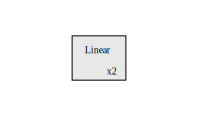

In [26]:
hl.build_graph(model, torch.zeros(([10, inp])))

Adam is an extremely popular optimizer because it's straight forward to implement, computationally efficient,
and doesn't require much memory.
<b>The Adam optimizer works especially well when you have large datasets that are sparse in nature.</b>

In [27]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
total_step = len(train_loader)
num_epochs = 10000
start_timestamp = time.time()
last_timestamp = start_timestamp
last_logged_epoch = 0

for n in range(num_epochs):
    epoch = n + 1
    print_log = epoch % 2000 == 0 or epoch == num_epochs
    if print_log:
        print ('Epoch [{}/{}]:'.format(epoch, num_epochs))

    for i, (features, target) in enumerate(train_loader):

        output = model(features)
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if print_log:
            print ('    Step [{}/{}], Loss: {:.4f}'.format(i+1, total_step, loss.item()))

    if print_log:
        current_timestamp = time.time()
        duration = current_timestamp - last_timestamp
        last_timestamp = current_timestamp
        print ('Epochs [{}-{}] took {:.3f}s'
               .format(last_logged_epoch + 1, epoch, duration))
        last_logged_epoch = epoch

total_duration = last_timestamp - start_timestamp
duration_per_epoch = total_duration / num_epochs
print('{} epochs took {:.3f}s, {:.3f}s per epoch'.format(num_epochs, total_duration, duration_per_epoch))

Epoch [2000/10000]:
    Step [1/6], Loss: 336013.0000
    Step [2/6], Loss: 377466.5938
    Step [3/6], Loss: 500388.2500
    Step [4/6], Loss: 307645.3125
    Step [5/6], Loss: 399598.2500
    Step [6/6], Loss: 339251.3750
Epochs [1-2000] took 15.133s
Epoch [4000/10000]:
    Step [1/6], Loss: 327168.8125
    Step [2/6], Loss: 300542.8125
    Step [3/6], Loss: 367830.6875
    Step [4/6], Loss: 249567.2969
    Step [5/6], Loss: 313119.7500
    Step [6/6], Loss: 389831.2812
Epochs [2001-4000] took 14.874s
Epoch [6000/10000]:
    Step [1/6], Loss: 282299.4688
    Step [2/6], Loss: 188293.9844
    Step [3/6], Loss: 356794.5312
    Step [4/6], Loss: 352975.1562
    Step [5/6], Loss: 381961.8750
    Step [6/6], Loss: 293151.7188
Epochs [4001-6000] took 15.066s
Epoch [8000/10000]:
    Step [1/6], Loss: 273857.9062
    Step [2/6], Loss: 305393.5312
    Step [3/6], Loss: 344563.9688
    Step [4/6], Loss: 411646.5625
    Step [5/6], Loss: 207290.7656
    Step [6/6], Loss: 268713.5625
Epochs [600

<b>Dropout and batch normalization layers have different modes for training and evaluation, and
the default mode for your model is the training mode</b>, so but before you use your neural
network for prediction, you need to switch to evaluation mode.
```
model.eval()
```

In [29]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [30]:
sample = x_test.iloc[45]
sample

registered       1432.000000
holiday             0.000000
weekday             0.000000
weathersit          1.000000
temp                0.255833
atemp               0.231700
season_fall         0.000000
season_spring       1.000000
season_summer       0.000000
season_winter       0.000000
Name: 729, dtype: float64

In [31]:
sample_tensor = torch.tensor(sample.values,
                             dtype=torch.float)
sample_tensor

tensor([1.4320e+03, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.5583e-01, 2.3170e-01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00])

In [32]:
with torch.no_grad():
    y_pred = model(sample_tensor)

print("Predicted count: ", (y_pred.item()))
print("Actual count: ", (y_test.iloc[45]))

Predicted count:  1664.5032958984375
Actual count:  cnt    1796
Name: 729, dtype: int64


In [33]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [34]:
y_pred = y_pred_tensor.detach().numpy()

y_pred.shape

(147, 1)

In [35]:
y_test.values.shape

(147, 1)

In [36]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
46,7498,6233.018555
130,1501,1459.209351
122,4590,5112.172363
95,4058,4556.976562
83,5445,5709.435059
47,801,783.685730
20,4123,4427.921875
97,5342,4784.252930
71,4795,5235.885254
18,4602,4974.653809


In [37]:
np.squeeze(y_test.values).shape

(147,)

An objective way to evaluate your regression model is to use the <b>R-square score(确定系数)</b>.
This score is a measure of how much of the variance in the underlying data has been
captured by our regression model. Higher values of R squared better our model.

In [38]:
sklearn.metrics.r2_score(y_test, y_pred)

0.916528882860665

The R squared score of our model is 90%. That's really high and is a good regression model.

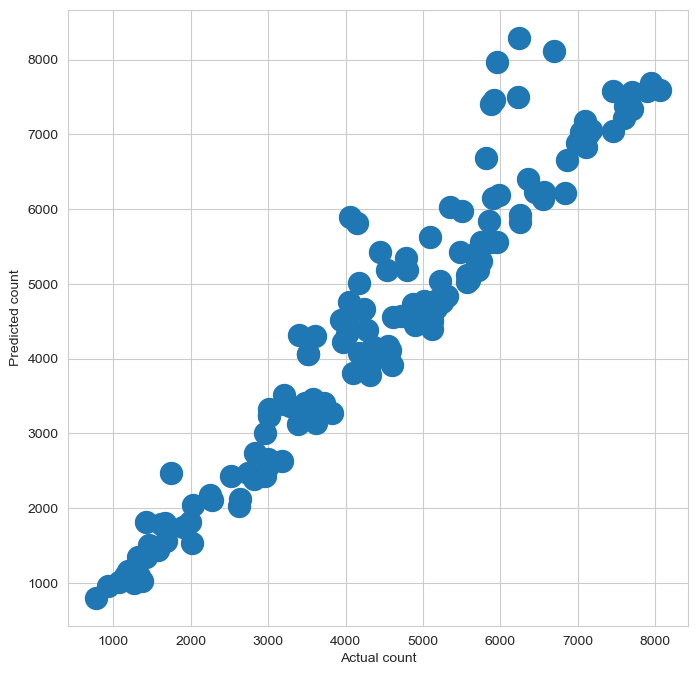

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test.values, s=250)

plt.xlabel("Actual count")
plt.ylabel("Predicted count")

plt.show()